In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from tabulate import tabulate

In [101]:
df=pd.read_csv('../input/heart.csv')

In [102]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [104]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [105]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [106]:
three_std = 3
outliers = 0

# loop throgh whole dataframe
for i, j in enumerate(df.columns):
    # Check if std is greater than 0 for the math
    if df.std()[i] > 0:
        z_score = (i - df.mean()[i]) / df.std()[i] 
        # Uses z score to check for outliers amd adds it to a count 
        if np.abs(z_score) > three_std:
            outliers = outliers + 1

print(outliers)

12


In [107]:
df_replace_nan = df.mask(df.sub(df.mean()).div(df.std()).abs().gt(3))
df_replace_nan.isnull().sum().sum() 

56

In [108]:
df_replace_median = df_replace_nan.fillna(df_replace_nan.median())
df_replace_median.isnull().sum().sum()

0

In [109]:
target = df['target'].values

In [110]:
df[['exang', 'target']].groupby(['exang']).mean()

,target
exang,
0,0.669118
1,0.205797


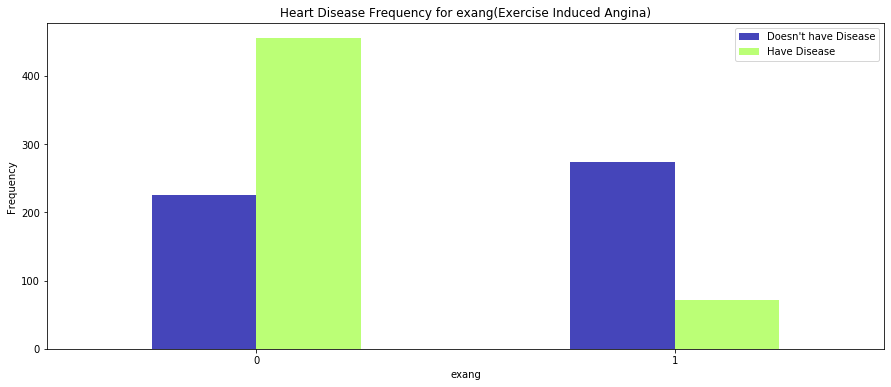

In [111]:
pd.crosstab(df.exang,df.target).plot(kind="bar",figsize=(15,6),color=['#4545ba','#bbff76' ])
plt.title('Heart Disease Frequency for exang(Exercise Induced Angina)')
plt.xlabel('exang')
plt.xticks(rotation=0)
plt.legend(["Doesn't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

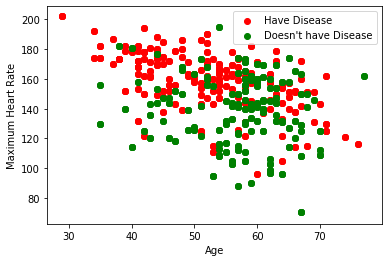

In [112]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)],c="green")
plt.legend(["Have Disease", "Doesn't have Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

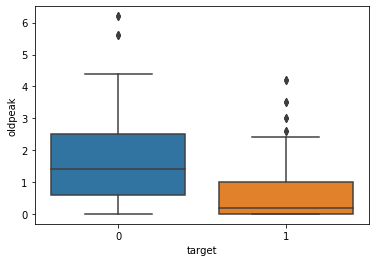

In [113]:
sns.boxplot(x=df.target, y=df.oldpeak, data=df)

In [114]:
y = df["target"]
x = df.drop('target',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [115]:
svm = SVC(kernel='linear')
svm.fit(x_train,y_train)

print("Accuracy of SVM Algo: {:.2f}".format(svm.score(x_test,y_test)*100))

Accuracy of SVM Algo: 85.71


In [116]:
pred = svm.predict(x_test)
pred[:10]

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [117]:
svm_confusion_matrix = metrics.confusion_matrix(y_true = y_test, y_pred = pred)
print("Confusion Matrix")
svm_confusion_matrix

Confusion Matrix


array([[112,  33],
       [ 11, 152]], dtype=int64)

In [118]:
#precison,recall,f1 score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84       145
           1       0.82      0.93      0.87       163

   micro avg       0.86      0.86      0.86       308
   macro avg       0.87      0.85      0.85       308
weighted avg       0.86      0.86      0.86       308



In [119]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}
 
svc_grd_srch = SVC(kernel="rbf")

clf = GridSearchCV(svc_grd_srch, param_grid=parameters, scoring='accuracy')

clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [120]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.005016,8.284253e-04,0.001963,2.750703e-05,1,0.01,"{'C': 1, 'gamma': 0.01}",0.841004,0.845188,0.799163,0.828452,0.020781,4,0.824268,0.855649,0.841004,0.840307,0.012821
1,0.005298,4.423735e-04,0.001995,4.052337e-07,1,0.001,"{'C': 1, 'gamma': 0.001}",0.836820,0.828452,0.790795,0.818689,0.020018,5,0.820084,0.820084,0.817992,0.819386,0.000986
2,0.006980,5.150430e-07,0.001996,1.700793e-06,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.506276,0.506276,0.506276,0.506276,0.000000,9,0.506276,0.506276,0.506276,0.506276,0.000000
3,0.004328,4.379856e-04,0.000997,6.836514e-07,10,0.01,"{'C': 10, 'gamma': 0.01}",0.853556,0.836820,0.866109,0.852162,0.011998,2,0.872385,0.905858,0.895397,0.891213,0.013982
4,0.004345,9.317628e-04,0.001668,4.692948e-04,10,0.001,"{'C': 10, 'gamma': 0.001}",0.824268,0.832636,0.782427,0.813110,0.021964,8,0.813808,0.841004,0.824268,0.826360,0.011201
5,0.005317,4.668962e-04,0.002667,4.709211e-04,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.836820,0.828452,0.790795,0.818689,0.020018,5,0.820084,0.815900,0.813808,0.816597,0.002609
6,0.007631,4.484893e-04,0.001671,4.743909e-04,100,0.01,"{'C': 100, 'gamma': 0.01}",0.891213,0.836820,0.895397,0.874477,0.026682,1,0.935146,0.951883,0.941423,0.942817,0.006903
7,0.005359,4.831106e-04,0.001001,1.857014e-06,100,0.001,"{'C': 100, 'gamma': 0.001}",0.861925,0.853556,0.824268,0.846583,0.016145,3,0.832636,0.884937,0.845188,0.854254,0.022293
8,0.004326,4.331542e-04,0.001637,4.517844e-04,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.824268,0.832636,0.790795,0.815900,0.018077,7,0.813808,0.841004,0.824268,0.826360,0.011201


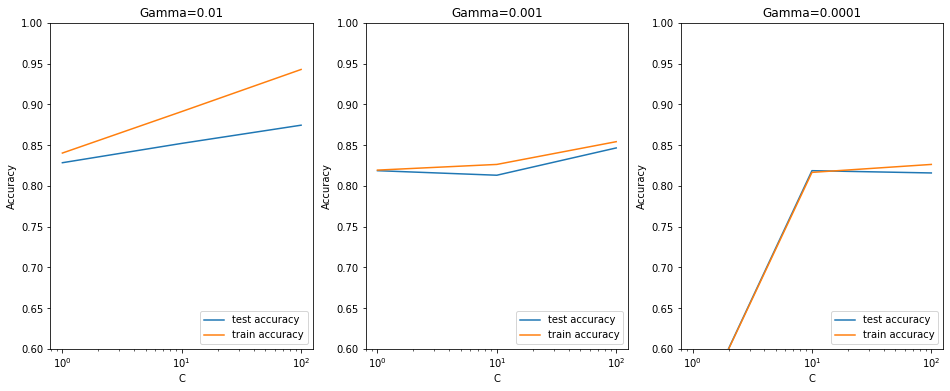

In [121]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])

plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])

plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])

plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

In [122]:
best_C_Value= 100
best_gamma_Value = 0.01
final_svm= SVC(kernel='rbf', C=best_C_Value, gamma=best_gamma_Value)
final_svm.fit(x_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
preds = final_svm.predict(x_test)

In [124]:
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = preds)
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=preds)

print(test_accuracy, "\n")
print("Confusion Matrix:\n")
print(confusion)

0.9545454545454546 

Confusion Matrix:

[[136   9]
 [  5 158]]


In [125]:
#precison,recall,f1 score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84       145
           1       0.82      0.93      0.87       163

   micro avg       0.86      0.86      0.86       308
   macro avg       0.87      0.85      0.85       308
weighted avg       0.86      0.86      0.86       308



In [126]:
def knnprediction(k, x_train, y_train, x_test):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    return pred

In [127]:
error_mean = []
for k in range(1, 41):
    pred_i = knnprediction(k, x_train, y_train, x_test)
    error_mean.append(np.mean(pred_i != y_test))

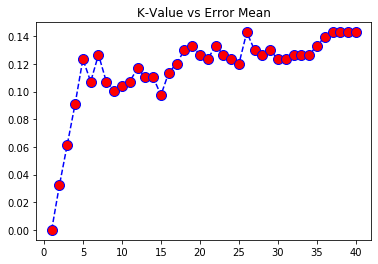

In [128]:
plt.plot(range(1,41), error_mean, linestyle='dashed', color='b', marker='o', markerfacecolor='r', markersize=10)
plt.title('K-Value vs Error Mean')
plt.show()

In [129]:
# knn model k=1
from sklearn.neighbors  import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)

In [130]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 820, Test set:205
Fold:2, Train set: 820, Test set:205
Fold:3, Train set: 820, Test set:205
Fold:4, Train set: 820, Test set:205
Fold:5, Train set: 820, Test set:205


In [131]:
#K FOLD CV K=5
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=knn,X=x_train,y=y_train,cv=5)
#print("Accuracy values for K=1 for 5 fold CV\n",accuracies)
accuracies

array([0.99305556, 0.97222222, 0.94444444, 0.99300699, 0.95774648])

In [132]:
i = 1
accuracy, precision, recall, f1_score = [], [], [], []
final_y_pred = np.array([])

for train_index, test_index in kf.split(x_train):
    print("\n\n*** FOLD ", i, " ***")
    print("\nTraining_index: ", train_index)
    print("Testing_index: ", test_index)

    x_train= np.array(x_train)
    y_train=np.array(y_train)
    x_cv_train, y_cv_train = x_train[train_index], y_train[train_index]
    x_cv_test, y_cv_test = x_train[test_index], y_train[test_index]

    print("Size of the training data: ", len(train_index))
    print("Size of the testing data: ", len(test_index))

    knn.fit(x_cv_train, y_cv_train)
    y_cv_pred = knn.predict(x_cv_test)
    # print("y_test size: ", len(y_cv_test))
    # print("y_pred size: ", len(y_cv_pred))

    # print("Iteration number and y_pred: ", i, y_cv_pred)

    accuracy.append(metrics.accuracy_score(y_cv_test, y_cv_pred))
    precision.append(metrics.precision_score(y_cv_test, y_cv_pred, average = None))
    recall.append(metrics.recall_score(y_cv_test, y_cv_pred, average = None))
    f1_score.append(metrics.f1_score(y_cv_test, y_cv_pred, average = None))

    final_y_pred = np.concatenate((final_y_pred, y_cv_pred), axis = None)
    # print("\nLength of final_y_pred: ", len(final_y_pred))
    # print("final_y_pred: ", final_y_pred)
    i = i + 1



*** FOLD  1  ***

Training_index:  [  0   1   3   4   5   7   8   9  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  32  33  34  35  36  37  38  40  42
  43  45  46  47  48  50  51  52  53  56  57  58  59  61  62  64  66  67
  68  71  73  74  75  79  80  82  83  85  87  88  89  91  92  93  94  95
  96  98  99 100 102 103 104 105 106 107 110 111 112 113 114 115 116 117
 119 121 122 123 124 125 126 127 128 129 130 134 137 138 139 140 141 142
 143 144 146 147 149 150 151 152 153 154 156 157 159 160 161 162 163 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 183 184 185 186
 187 188 189 190 191 193 194 195 197 198 199 200 201 202 203 204 205 206
 207 213 214 216 217 218 219 221 222 223 224 225 226 228 229 230 231 232
 233 234 235 236 237 238 240 241 242 243 245 246 248 249 250 251 252 253
 255 256 258 259 260 261 262 263 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 285 287 288 289 290 291 293 295 296 297
 298 299 301 3

In [133]:
# averaging over all the values for each fold:
for i, val in enumerate(precision):
    precision[i] = precision[i].mean()

for i, val in enumerate(recall):
    recall[i] = recall[i].mean()

for i, val in enumerate(f1_score):
    f1_score[i] = f1_score[i].mean()

# print("\nACCURACY: ", accuracy)
# print("PRECISION: ", precision)
# print("RECALL: ", recall)
# print("F1 SCORE: ", f1_score)

table_print = []
for acc, pre, rec, f1 in zip(accuracy, precision, recall, f1_score):
    table_print.append([acc,pre,rec,f1])

print("\nKNN Evaluation Metrics:")
print(tabulate(table_print, headers = ["Accuracy", "Precision", "Recall", "F1 Score"], tablefmt = 'psql'))

print("Average metrics over five folds: ")
print("\nThe average accuracy is: %.4f" % (sum(accuracy)/len(accuracy)))
print("The average precision is: %.4f" % (sum(precision)/len(precision)))
print("The average recall is: %.4f" % (sum(recall)/len(recall)))
print("The average f1_score is: %.4f" % (sum(f1_score)/len(f1_score)))


KNN Evaluation Metrics:
+------------+-------------+----------+------------+
|   Accuracy |   Precision |   Recall |   F1 Score |
|------------+-------------+----------+------------|
|   0.944444 |    0.944402 | 0.944402 |   0.944402 |
|   0.965278 |    0.964928 | 0.965557 |   0.965196 |
|   0.979021 |    0.979167 | 0.97973  |   0.979017 |
|   0.972028 |    0.974026 | 0.971429 |   0.971961 |
|   0.944056 |    0.94598  | 0.945456 |   0.944053 |
+------------+-------------+----------+------------+
Average metrics over five folds: 

The average accuracy is: 0.9610
The average precision is: 0.9617
The average recall is: 0.9613
The average f1_score is: 0.9609


In [134]:
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.3, random_state = 520)
x_train, Val_data, y_train, val_labels = train_test_split(x_train, y_train, test_size = 0.3, random_state = 84)

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train, y_train)
predictions = model.predict(Val_data)
print("Evaluation on the testing data: \n")
print(classification_report(val_labels, predictions))
print("Confusion Matrix: \n")
print(confusion_matrix(val_labels, predictions))

Evaluation on the testing data: 

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       102
           1       0.91      0.93      0.92       114

   micro avg       0.92      0.92      0.92       216
   macro avg       0.92      0.92      0.92       216
weighted avg       0.92      0.92      0.92       216

Confusion Matrix: 

[[ 92  10]
 [  8 106]]


In [135]:
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
# print("Y_prediction: ", y_predict)

test_accuracy = metrics.accuracy_score(y_test, y_predict)
test_accuracy = test_accuracy * 100
print("\nAccuracy of the testing dataset: %.4f" % test_accuracy, "%")


Accuracy of the testing dataset: 92.8571 %


In [136]:
# knn model k=2
from sklearn.neighbors  import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=2)

In [137]:
#K FOLD CV K=5
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=knn,X=x_train,y=y_train,cv=5)
accuracies

array([0.82178218, 0.78217822, 0.82178218, 0.75757576, 0.70707071])

In [138]:
i = 1
accuracy, precision, recall, f1_score = [], [], [], []
final_y_pred = np.array([])

for train_index, test_index in kf.split(x_train):
    print("\n\n*** FOLD ", i, " ***")
    print("\nTraining_index: ", train_index)
    print("Testing_index: ", test_index)

    x_train= np.array(x_train)
    y_train=np.array(y_train)
    x_cv_train, y_cv_train = x_train[train_index], y_train[train_index]
    x_cv_test, y_cv_test = x_train[test_index], y_train[test_index]

    print("Size of the training data: ", len(train_index))
    print("Size of the testing data: ", len(test_index))

    knn.fit(x_cv_train, y_cv_train)
    y_cv_pred = knn.predict(x_cv_test)
    # print("y_test size: ", len(y_cv_test))
    # print("y_pred size: ", len(y_cv_pred))

    # print("Iteration number and y_pred: ", i, y_cv_pred)

    accuracy.append(metrics.accuracy_score(y_cv_test, y_cv_pred))
    precision.append(metrics.precision_score(y_cv_test, y_cv_pred, average = None))
    recall.append(metrics.recall_score(y_cv_test, y_cv_pred, average = None))
    f1_score.append(metrics.f1_score(y_cv_test, y_cv_pred, average = None))

    final_y_pred = np.concatenate((final_y_pred, y_cv_pred), axis = None)
    # print("\nLength of final_y_pred: ", len(final_y_pred))
    # print("final_y_pred: ", final_y_pred)
    i = i + 1



*** FOLD  1  ***

Training_index:  [  1   3   4   5   6   7   8  10  12  13  14  16  17  19  20  21  23  24
  25  26  27  28  29  31  32  34  35  36  37  38  40  41  42  43  44  45
  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  64  65  66
  67  71  74  80  81  83  85  87  88  89  91  92  94  95  96  97  98  99
 100 102 103 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 125 126 127 128 129 130 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 149 150 151 152 153 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 174 175 176 177 178 179 181
 183 184 186 187 188 189 190 191 192 195 196 197 198 199 200 201 202 203
 205 206 207 208 210 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241 242 243
 244 245 246 247 248 250 251 252 253 254 255 256 257 258 259 260 261 263
 264 265 266 267 269 270 271 272 273 274 275 276 279 281 282 283 284 285
 286 287 288 2

In [139]:
# averaging over all the values for each fold:
for i, val in enumerate(precision):
    precision[i] = precision[i].mean()

for i, val in enumerate(recall):
    recall[i] = recall[i].mean()

for i, val in enumerate(f1_score):
    f1_score[i] = f1_score[i].mean()

# print("\nACCURACY: ", accuracy)
# print("PRECISION: ", precision)
# print("RECALL: ", recall)
# print("F1 SCORE: ", f1_score)

table_print = []
for acc, pre, rec, f1 in zip(accuracy, precision, recall, f1_score):
    table_print.append([acc,pre,rec,f1])

print("\nKNN Evaluation Metrics:")
print(tabulate(table_print, headers = ["Accuracy", "Precision", "Recall", "F1 Score"], tablefmt = 'psql'))

print("Average metrics over five folds: ")
print("\nThe average accuracy is: %.4f" % (sum(accuracy)/len(accuracy)))
print("The average precision is: %.4f" % (sum(precision)/len(precision)))
print("The average recall is: %.4f" % (sum(recall)/len(recall)))
print("The average f1_score is: %.4f" % (sum(f1_score)/len(f1_score)))


KNN Evaluation Metrics:
+------------+-------------+----------+------------+
|   Accuracy |   Precision |   Recall |   F1 Score |
|------------+-------------+----------+------------|
|   0.772277 |    0.789959 | 0.778105 |   0.770839 |
|   0.8      |    0.826818 | 0.814141 |   0.799277 |
|   0.75     |    0.796346 | 0.768687 |   0.746938 |
|   0.77     |    0.788588 | 0.786822 |   0.769977 |
|   0.83     |    0.839485 | 0.796689 |   0.809225 |
+------------+-------------+----------+------------+
Average metrics over five folds: 

The average accuracy is: 0.7845
The average precision is: 0.8082
The average recall is: 0.7889
The average f1_score is: 0.7793


In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.3, random_state = 520)
x_train, Val_data, y_train, val_labels = train_test_split(x_train, y_train, test_size = 0.3, random_state = 84)

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train, y_train)
predictions = model.predict(Val_data)
print("Evaluation on the testing data: \n")
print(classification_report(val_labels, predictions))
print("Confusion Matrix: \n")
print(confusion_matrix(val_labels, predictions))

Evaluation on the testing data: 

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       102
           1       0.91      0.93      0.92       114

   micro avg       0.92      0.92      0.92       216
   macro avg       0.92      0.92      0.92       216
weighted avg       0.92      0.92      0.92       216

Confusion Matrix: 

[[ 92  10]
 [  8 106]]


In [141]:
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
# print("Y_prediction: ", y_predict)

test_accuracy = metrics.accuracy_score(y_test, y_predict)
test_accuracy = test_accuracy * 100
print("\nAccuracy of the testing dataset: %.4f" % test_accuracy, "%")


Accuracy of the testing dataset: 85.7143 %


In [142]:
# knn model k=3
from sklearn.neighbors  import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)

In [143]:
#K FOLD CV K=5
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=knn,X=x_train,y=y_train,cv=5)
accuracies

array([0.77227723, 0.72277228, 0.73267327, 0.68686869, 0.61616162])

In [144]:
i = 1
accuracy, precision, recall, f1_score = [], [], [], []
final_y_pred = np.array([])

for train_index, test_index in kf.split(x_train):
    print("\n\n*** FOLD ", i, " ***")
    print("\nTraining_index: ", train_index)
    print("Testing_index: ", test_index)

    x_train= np.array(x_train)
    y_train=np.array(y_train)
    x_cv_train, y_cv_train = x_train[train_index], y_train[train_index]
    x_cv_test, y_cv_test = x_train[test_index], y_train[test_index]

    print("Size of the training data: ", len(train_index))
    print("Size of the testing data: ", len(test_index))

    knn.fit(x_cv_train, y_cv_train)
    y_cv_pred = knn.predict(x_cv_test)
    # print("y_test size: ", len(y_cv_test))
    # print("y_pred size: ", len(y_cv_pred))

    # print("Iteration number and y_pred: ", i, y_cv_pred)

    accuracy.append(metrics.accuracy_score(y_cv_test, y_cv_pred))
    precision.append(metrics.precision_score(y_cv_test, y_cv_pred, average = None))
    recall.append(metrics.recall_score(y_cv_test, y_cv_pred, average = None))
    f1_score.append(metrics.f1_score(y_cv_test, y_cv_pred, average = None))

    final_y_pred = np.concatenate((final_y_pred, y_cv_pred), axis = None)
    # print("\nLength of final_y_pred: ", len(final_y_pred))
    # print("final_y_pred: ", final_y_pred)
    i = i + 1



*** FOLD  1  ***

Training_index:  [  1   3   4   5   6   7   8  10  12  13  14  16  17  19  20  21  23  24
  25  26  27  28  29  31  32  34  35  36  37  38  40  41  42  43  44  45
  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  64  65  66
  67  71  74  80  81  83  85  87  88  89  91  92  94  95  96  97  98  99
 100 102 103 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 125 126 127 128 129 130 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 149 150 151 152 153 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 174 175 176 177 178 179 181
 183 184 186 187 188 189 190 191 192 195 196 197 198 199 200 201 202 203
 205 206 207 208 210 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241 242 243
 244 245 246 247 248 250 251 252 253 254 255 256 257 258 259 260 261 263
 264 265 266 267 269 270 271 272 273 274 275 276 279 281 282 283 284 285
 286 287 288 2

In [145]:
# averaging over all the values for each fold:
for i, val in enumerate(precision):
    precision[i] = precision[i].mean()

for i, val in enumerate(recall):
    recall[i] = recall[i].mean()

for i, val in enumerate(f1_score):
    f1_score[i] = f1_score[i].mean()

# print("\nACCURACY: ", accuracy)
# print("PRECISION: ", precision)
# print("RECALL: ", recall)
# print("F1 SCORE: ", f1_score)

table_print = []
for acc, pre, rec, f1 in zip(accuracy, precision, recall, f1_score):
    table_print.append([acc,pre,rec,f1])

print("\nKNN Evaluation Metrics:")
print(tabulate(table_print, headers = ["Accuracy", "Precision", "Recall", "F1 Score"], tablefmt = 'psql'))

print("Average metrics over five folds: ")
print("\nThe average accuracy is: %.4f" % (sum(accuracy)/len(accuracy)))
print("The average precision is: %.4f" % (sum(precision)/len(precision)))
print("The average recall is: %.4f" % (sum(recall)/len(recall)))
print("The average f1_score is: %.4f" % (sum(f1_score)/len(f1_score)))


KNN Evaluation Metrics:
+------------+-------------+----------+------------+
|   Accuracy |   Precision |   Recall |   F1 Score |
|------------+-------------+----------+------------|
|   0.742574 |    0.743524 | 0.743907 |   0.742549 |
|   0.79     |    0.792468 | 0.794949 |   0.789811 |
|   0.66     |    0.663589 | 0.664646 |   0.659864 |
|   0.68     |    0.676435 | 0.679315 |   0.676768 |
|   0.74     |    0.731884 | 0.744482 |   0.733169 |
+------------+-------------+----------+------------+
Average metrics over five folds: 

The average accuracy is: 0.7225
The average precision is: 0.7216
The average recall is: 0.7255
The average f1_score is: 0.7204


In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.3, random_state = 520)
x_train, Val_data, y_train, val_labels = train_test_split(x_train, y_train, test_size = 0.3, random_state = 84)

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train, y_train)
predictions = model.predict(Val_data)
print("Evaluation on the testing data: \n")
print(classification_report(val_labels, predictions))
print("Confusion Matrix: \n")
print(confusion_matrix(val_labels, predictions))

Evaluation on the testing data: 

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       102
           1       0.91      0.93      0.92       114

   micro avg       0.92      0.92      0.92       216
   macro avg       0.92      0.92      0.92       216
weighted avg       0.92      0.92      0.92       216

Confusion Matrix: 

[[ 92  10]
 [  8 106]]


In [147]:
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
# print("Y_prediction: ", y_predict)

test_accuracy = metrics.accuracy_score(y_test, y_predict)
test_accuracy = test_accuracy * 100
print("\nAccuracy of the testing dataset: %.4f" % test_accuracy, "%")


Accuracy of the testing dataset: 79.5455 %
